Churn Analysis & why it is needed for Companies :
Oftentimes. A Longstanding & Loyal  customers for a company  is economical than risking on spending for new customer addition.Thus for this Churn Analysis based on KPIs such as the Product . Region,Client Segment or other metrics specific to the companies is highly crucial.

Using Surveys & Outreach to calculate the churn rate & retention value will help in understanding the pattern of association of customers with the company & decide upon what kind of improvement needs to be made.


RFM:

Recency
the likelihood of engaging in future transactions with recent customers is arguably higher.








Frequency

marketing efforts might be made to remind them that it's been a while since their last transaction, while offering them an incentive to resume buying.


If the purchase cycle can be predicted — for example when a customer needs to buy more groceries — marketing efforts may be directed towards reminding them to visit the business when staple items run low.

Monetary Value


encouraging customers who spend the most money to continue to do so. While this can produce a better return on investment in marketing and customer service, it also runs the risk of alienating customers who have been consistent but may not spend as much with each transaction.


Significance


Despite the useful information that is acquired through RFM analysis, firms must take into consideration that even the best customers will not want to be over-solicited, and the lower-ranking customers may be cultivated with additional marketing efforts. It works as a snapshot of the clientele and as a tool to prioritize nurturing, but it should not be taken as a license to simply do more of the same-old, same-old sales techniques.

Each customer is ranked in each of these categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The higher the customer ranking, the more likely it is that they will do business again with a firm. Essentially, the RFM model corroborates the marketing adage that "80% of business comes from 20% of the customers."



CLTV:
Customer lifetime value is the total worth to a business of a customer over the whole period of their relationship. It’s an important metric as it costs less to keep existing customers than it does to acquire new ones, so increasing the value of your existing customers is a great way to drive growth.

CLV is distinct from the Net Promoter Score (NPS) that measures customer loyalty, and CSAT that measures customer satisfaction because it is tangibly linked to revenue rather than a somewhat intangible promise of loyalty and satisfaction.


NPS stands for Net Promoter Score which is a metric used in customer experience programs. NPS measures the loyalty of customers to a company. NPS scores are measured with a single question survey and reported with a number from -100 to +100, a higher score is desirable.

CSAT:
Respondents use the following 1 to 5 scale:
1. Very unsatisfied
2. Unsatisfied
3. Neutral
4. Satisfied
5. Very satisfied
 
CLV is a great metric to use when you have a multi-year relationship with a customer – say for a paid TV subscription or mobile phone contract. And it’s good for spotting the early signs of attrition – say, for example, you see spend dropping off after the first year as they use the subscription less and less.
 
For example, if the CLV of an average coffee shop customer is $1,000 and it costs more than £1,000 to acquire them (via advertising, marketing, offers, etc.) the coffee chain could be losing money unless it pares back its acquisition costs. Another thing to keep a close eye on is the cost of that customer to your business.
 
 
Another factor in the equation is Cost to Serve. This is part of the cost of doing business, and it involves everything you do to get the product or service into the customer’s hands and doing what they need it to do. For example, logistics, overheads in your physical location, contact centre costs, and so on.
 
Breaking this down by customer can help you understand these costs on a granular level, and dig into details like whether your high CLV customers cost the same as the low ones, and whether some customers are more expensive than others. If the cost of serving an existing customer becomes too high, you may be making a loss despite their seemingly high CLV.
CLV can be measured in the following way:
Identify the touchpoints where the customer creates the value
Integrate records to create the customer journey
Measure revenue at each touchpoint
Add together over the lifetime of that customer


In [1]:
!pip install xlrd
!pip install openpyxl
!pip install lifetimes
!pip install missingno

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
import warnings
warnings.filterwarnings("ignore")

In [3]:
# reading the dataset

df1=pd.read_excel("C:\\Users\\vekat\\Downloads\\crmdata\\online_retail_II.xlsx",
                  sheet_name="Year 2009-2010")
df1

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [4]:
df=df1.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
#Checking Variables

def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(525461, 8)
##################### Types #####################
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object
##################### Head #####################
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
##################### Tail #####################
       Invoice 

<AxesSubplot:>

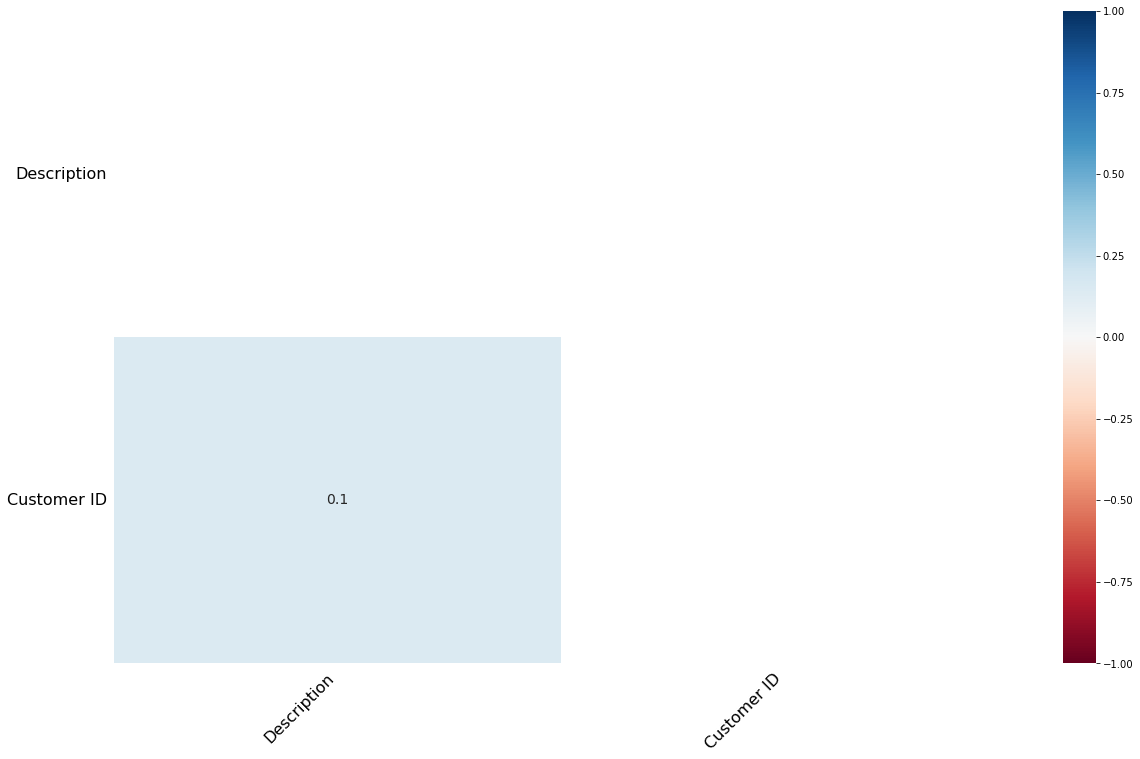

In [6]:
# there is no specific correlation between missing values


msno.heatmap(df)

<AxesSubplot:xlabel='Quantity'>

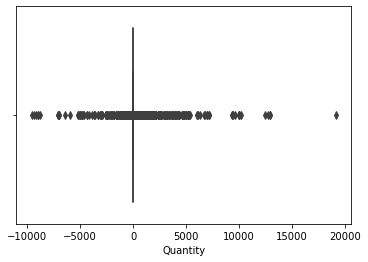

In [7]:
sns.boxplot(df["Quantity"])

<AxesSubplot:xlabel='Price'>

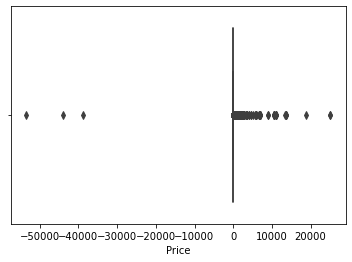

In [8]:
sns.boxplot(df["Price"])

In [9]:
#Outlier values are trimmed (very little) without damaging the data.Here we have set a lower and upper limit.
#But since the lower limit is set, we'll only assign it to the upper limit. We'll do it for Quantity and Price.

In [10]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [11]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [12]:
#Removal of outliers for Quantity & Price
replace_with_thresholds(df,"Quantity")
replace_with_thresholds(df,"Price")

In [13]:
# outliers values are now cleaner.

df.describe([0.01,0.25,0.50,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
Quantity,525461.0,8.685688,60.954547,-9600.00,-3.00,1.00,3.0,10.00,120.00,304.50
Price,525461.0,3.264510,109.822785,-53594.36,0.21,1.25,2.1,4.21,19.95,49.56
Customer ID,417534.0,15360.645478,1680.811316,12346.00,12435.00,13983.00,15311.0,16799.00,18196.00,18287.00


In [14]:
#Missing values are deleted. Canceled Invoices are not received and and a new variable was created.

In [15]:
dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]

NameError: name 'dataframe' is not defined

In [16]:
def crm_data_prep(dataframe):
    dataframe.dropna(axis=0, inplace=True)
    #Remove values in Invoice that contain C
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]
    dataframe = dataframe[dataframe["Quantity"] > 0]
    dataframe["TotalPrice"] = dataframe["Quantity"] * dataframe["Price"]
    return dataframe

In [17]:
df=crm_data_prep(df)
check_df(df)

##################### Shape #####################
(407695, 9)
##################### Types #####################
Invoice                object
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
TotalPrice            float64
dtype: object
##################### Head #####################
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS      12.0   
1  489434    79323P                   PINK CHERRY LIGHTS      12.0   
2  489434    79323W                  WHITE CHERRY LIGHTS      12.0   

          InvoiceDate  Price  Customer ID         Country  TotalPrice  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom        83.4  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom 

In [18]:
df["Invoice"]

0         489434
1         489434
2         489434
3         489434
4         489434
           ...  
525456    538171
525457    538171
525458    538171
525459    538171
525460    538171
Name: Invoice, Length: 407695, dtype: object

<AxesSubplot:xlabel='Quantity'>

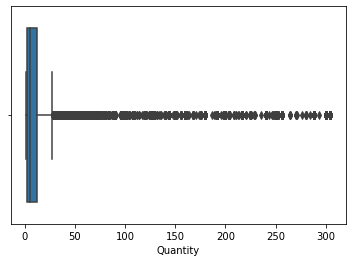

In [19]:
sns.boxplot(df["Quantity"])

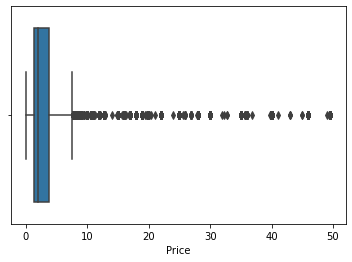

In [20]:
sns.boxplot(df["Price"]);

In [ ]:
#RFM represents a method used for measuring customer value. An RFM analysis can show you who are the most 
#valuable customers for your business. The ones who buy most frequently, most often, and spend the most.
#First of all, the metrics you have seen are calculated

In [21]:
# last transaction date

df["InvoiceDate"].max()

Timestamp('2010-12-09 20:01:00')

In [25]:
def create_rfm(dataframe):
    # RFM Metrics
    

    today_date = dt.datetime(2010, 12, 11)

    rfm = dataframe.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                                'Invoice': lambda num: num.nunique(),
                                                "TotalPrice": lambda price: price.sum()})

    rfm.columns = ['recency', 'frequency', "monetary"]

    rfm = rfm[(rfm['monetary'] > 0)]


    # RFM score
    rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
    rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])



    # segment naming
    rfm['rfm_segment'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)

    seg_map = {
        r'[1-2][1-2]': 'hibernating',
        r'[1-2][3-4]': 'at_risk',
        r'[1-2]5': 'cant_loose',
        r'3[1-2]': 'about_to_sleep',
        r'33': 'need_attention',
        r'[3-4][4-5]': 'loyal_customers',
        r'41': 'promising',
        r'51': 'new_customers',
        r'[4-5][2-3]': 'potential_loyalists',
        r'5[4-5]': 'champions'
    }

    rfm['rfm_segment'] = rfm['rfm_segment'].replace(seg_map, regex=True)
    rfm = rfm[["recency", "frequency", "monetary", "rfm_segment"]]
    return rfm

In [26]:

#Discretize variable into equal-sized buckets based on rank or based on sample quantiles. 
#For example 1000 values for 10 quantiles would produce a Categorical object indicating quantile membership for each data point.
# RFM score
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
# segment naming
rfm['rfm_segment'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)
rfm['rfm_segment']

NameError: name 'rfm' is not defined

In [27]:
rfm['rfm_segment'] = rfm['rfm_segment'].replace(seg_map, regex=True)
rfm['rfm_segment']

NameError: name 'rfm' is not defined

In [28]:
rfm = create_rfm(df)
rfm.head()

,recency,frequency,monetary,rfm_segment
Customer ID,,,,
12346.0,165,11,372.86,cant_loose
12347.0,3,2,1323.32,potential_loyalists
12348.0,74,1,222.16,hibernating
12349.0,43,3,2320.26,need_attention
12351.0,11,1,300.93,new_customers


In [ ]:
#-Who is our most profitable customer? -What is it they appreciate in my products or services? -Who are my new customers? -How do I attract new customers to the company?

#The answers to the questions are hidden in the segmentation.

#With better RFM segmentation, we’ll be able to address certain segments in a personalized manner, based on their needs and preferences.

<AxesSubplot:xlabel='rfm_segment', ylabel='frequency'>

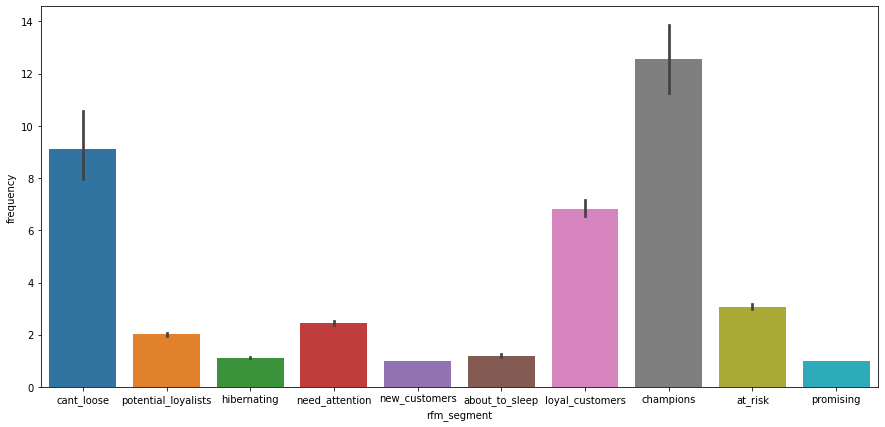

In [29]:
plt.figure(figsize=(15,7))
sns.barplot(x="rfm_segment", y="frequency", data=rfm)

In [30]:
check_df(rfm)

##################### Shape #####################
(4312, 4)
##################### Types #####################
recency          int64
frequency        int64
monetary       float64
rfm_segment     object
dtype: object
##################### Head #####################
             recency  frequency  monetary          rfm_segment
Customer ID                                                   
12346.0          165         11    372.86           cant_loose
12347.0            3          2   1323.32  potential_loyalists
12348.0           74          1    222.16          hibernating
##################### Tail #####################
             recency  frequency  monetary      rfm_segment
Customer ID                                               
18285.0          296          1    426.56      hibernating
18286.0          112          2   1295.99          at_risk
18287.0           18          4   2345.27  loyal_customers
##################### NA #####################
recency        0
frequency   

CLTV Calculated

This time we divided people into A, B, C segments. (Not to be confused with rfm segmentation.) Let's remember we do life-time value calculations.

The calculations in the table have been made.

Standardization process was done for better understanding.

In [31]:
def create_cltv_calculated(dataframe):
    # avg_order_value
    dataframe['avg_order_value'] = dataframe['monetary'] / dataframe['frequency']

    # purchase_frequency
    dataframe["purchase_frequency"] = dataframe['frequency'] / dataframe.shape[0]

    # repeat rate & churn rate
    repeat_rate = dataframe[dataframe.frequency > 1].shape[0] / dataframe.shape[0]
    churn_rate = 1 - repeat_rate

    # profit_margin
    dataframe['profit_margin'] = dataframe['monetary'] * 0.05

    # Customer Value
    dataframe['cv'] = (dataframe['avg_order_value'] * dataframe["purchase_frequency"])

    # Customer Lifetime Value
    dataframe['cltv'] = (dataframe['cv'] / churn_rate) * dataframe['profit_margin']

    # minmaxscaler
    scaler = MinMaxScaler(feature_range=(1, 100))
    scaler.fit(dataframe[["cltv"]])
    dataframe["cltv_calculated"] = scaler.transform(dataframe[["cltv"]])

    dataframe["cltv_calculated_segment"] = pd.qcut(dataframe["cltv_calculated"], 3, labels=["C", "B", "A"])

    dataframe = dataframe[["recency", "frequency", "monetary", "rfm_segment",
                           "cltv_calculated", "cltv_calculated_segment"]]

    return dataframe


In [32]:
dataframe['avg_order_value'] = dataframe['monetary'] / dataframe['frequency']

# purchase_frequency
dataframe["purchase_frequency"] = dataframe['frequency'] / dataframe.shape[0]
repeat_rate = dataframe[dataframe.frequency > 1].shape[0] / dataframe.shape[0]
churn_rate = 1 - repeat_rate
churn_rate

NameError: name 'dataframe' is not defined

In [33]:
rfm_cltv = create_cltv_calculated(rfm)
check_df(rfm_cltv)

##################### Shape #####################
(4312, 6)
##################### Types #####################
recency                       int64
frequency                     int64
monetary                    float64
rfm_segment                  object
cltv_calculated             float64
cltv_calculated_segment    category
dtype: object
##################### Head #####################
             recency  frequency  monetary          rfm_segment  \
Customer ID                                                      
12346.0          165         11    372.86           cant_loose   
12347.0            3          2   1323.32  potential_loyalists   
12348.0           74          1    222.16          hibernating   

             cltv_calculated cltv_calculated_segment  
Customer ID                                           
12346.0             1.000150                       C  
12347.0             1.001888                       A  
12348.0             1.000053                       C  
#####

<AxesSubplot:xlabel='rfm_segment', ylabel='cltv_calculated'>

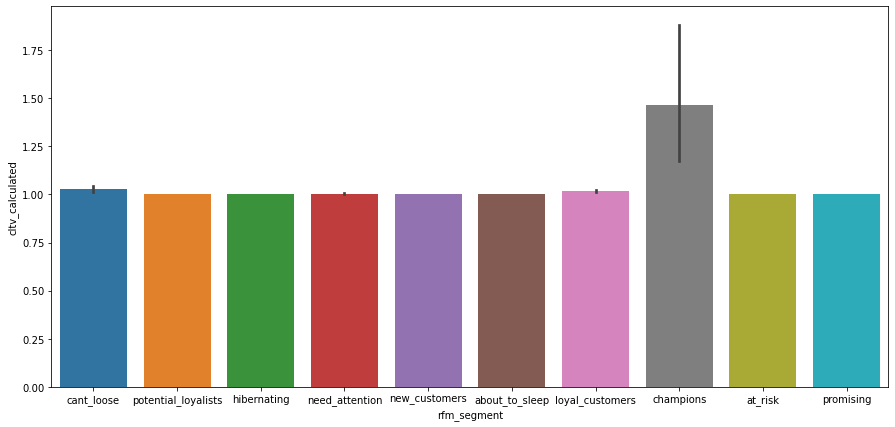

In [34]:
plt.figure(figsize=(15,7))
sns.barplot(x="rfm_segment", y="cltv_calculated", data=rfm_cltv)

In [35]:
rfm_cltv.head()

,recency,frequency,monetary,rfm_segment,cltv_calculated,cltv_calculated_segment
Customer ID,,,,,,
12346.0,165,11,372.86,cant_loose,1.000150,C
12347.0,3,2,1323.32,potential_loyalists,1.001888,A
12348.0,74,1,222.16,hibernating,1.000053,C
12349.0,43,3,2320.26,need_attention,1.005803,A
12351.0,11,1,300.93,new_customers,1.000098,C


<AxesSubplot:xlabel='cltv_calculated', ylabel='cltv_calculated_segment'>

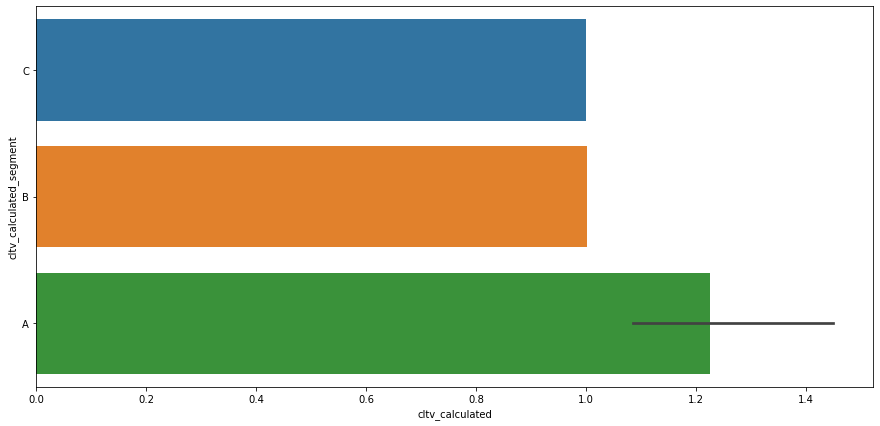

In [36]:
plt.figure(figsize=(15,7))
sns.barplot(x="cltv_calculated", y="cltv_calculated_segment", data=rfm_cltv)

What is a cohort model?

Instead of simply assuming all the customers to be one group, we can try to split them into multiple groups and calculate the CLTV for each group.

BG-NBD
In short, expected sales value. Used to estimate how many purchases customers can make over a period of time

This method computes the probability that a customer with history (frequency, recency_weekly, T_weekly) is currently alive.(relationship between recency & frequency)



Gamma Gamma
-conditional expected number of purchases up to time-

Note1: There should be no correlation between the frequency of transactions and their monetary value.

Note2: We are considering only customers who made repeat purchases with the business i.e., frequency > 0. Because, if the frequency is 0, it means that they are a one-time customer and are considered already dead.

No handles with labels found to put in legend.


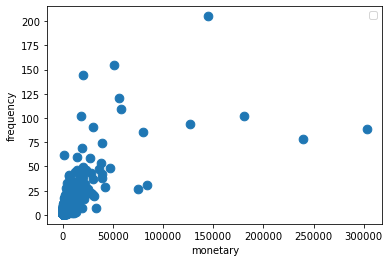

In [37]:
# The correlation seems very weak. 

plt.scatter(rfm_cltv.monetary,rfm_cltv.frequency,s=75)


plt.xlabel("monetary")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [38]:
def create_cltv_predicted(dataframe):
    today_date = dt.datetime(2010, 12, 11)

    ## recency value customized
    rfm = dataframe.groupby('Customer ID').agg({'InvoiceDate': [lambda date: (date.max()-date.min()).days,
                                                                lambda date: (today_date - date.min()).days],
                                                'Invoice': lambda num: num.nunique(),
                                                'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

    rfm.columns = rfm.columns.droplevel(0)

    ## recency_cltv_predicted
    rfm.columns = ['recency_cltv_predicted', 'T', 'frequency', 'monetary']

    ## basic monetary_avg
    rfm["monetary"] = rfm["monetary"] / rfm["frequency"]

    rfm.rename(columns={"monetary": "monetary_avg"}, inplace=True)


  
    ## recency_weekly_cltv_predicted
    rfm["recency_weekly_cltv_predicted"] = rfm["recency_cltv_predicted"] / 7
    rfm["T_weekly"] = rfm["T"] / 7



    # CONTROL
    rfm = rfm[rfm["monetary_avg"] > 0]

    ## recency filter
    rfm = rfm[(rfm['frequency'] > 1)]

    rfm["frequency"] = rfm["frequency"].astype(int)

    # BGNBD
    bgf = BetaGeoFitter(penalizer_coef=0.01)
    bgf.fit(rfm['frequency'],
            rfm['recency_weekly_cltv_predicted'],
            rfm['T_weekly'])


    # Gamma Gamma
    ggf = GammaGammaFitter(penalizer_coef=0.01)
    ggf.fit(rfm['frequency'], rfm['monetary_avg'])
    rfm["expected_average_profit"] = ggf.conditional_expected_average_profit(rfm['frequency'],
                                                                             rfm['monetary_avg'])
    # 6 months cltv_p
    cltv = ggf.customer_lifetime_value(bgf,
                                       rfm['frequency'],
                                       rfm['recency_weekly_cltv_predicted'],
                                       rfm['T_weekly'],
                                       rfm['monetary_avg'],
                                       time=6,
                                       freq="W",
                                       discount_rate=0.01)

    rfm["cltv_predicted"] = cltv

    # minmaxscaler
    scaler = MinMaxScaler(feature_range=(1, 100))
    scaler.fit(rfm[["cltv_predicted"]])
    rfm["cltv_predicted"] = scaler.transform(rfm[["cltv_predicted"]])

    # rfm.fillna(0, inplace=True)

    # cltv_predicted_segment
    rfm["cltv_predicted_segment"] = pd.qcut(rfm["cltv_predicted"], 3, labels=["C", "B", "A"])

    ## recency_cltv_predicted, recency_weekly_cltv_predicted
    rfm = rfm[["recency_cltv_predicted", "T", "monetary_avg", "recency_weekly_cltv_predicted", "T_weekly",
               "expected_average_profit","cltv_predicted", "cltv_predicted_segment"]]


    return rfm

In [39]:
rfm_cltv_predicted = create_cltv_predicted(df)
check_df(rfm_cltv_predicted)

##################### Shape #####################
(2893, 8)
##################### Types #####################
recency_cltv_predicted              int64
T                                   int64
monetary_avg                      float64
recency_weekly_cltv_predicted     float64
T_weekly                          float64
expected_average_profit           float64
cltv_predicted                    float64
cltv_predicted_segment           category
dtype: object
##################### Head #####################
             recency_cltv_predicted    T  monetary_avg  \
Customer ID                                              
12346.0                         196  361     33.896364   
12347.0                          37   40    661.660000   
12349.0                         181  225    773.420000   

             recency_weekly_cltv_predicted   T_weekly  \
Customer ID                                             
12346.0                          28.000000  51.571429   
12347.0                      

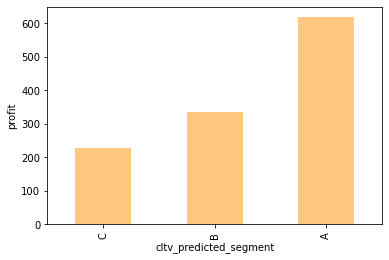

In [40]:
rfm_cltv_predicted.groupby('cltv_predicted_segment').agg('expected_average_profit').mean().plot(kind='bar', colormap='copper_r');

plt.ylabel("profit");

In [41]:
crm_final = rfm_cltv.merge(rfm_cltv_predicted, on="Customer ID", how="left")
check_df(crm_final)

##################### Shape #####################
(4312, 14)
##################### Types #####################
recency                             int64
frequency                           int64
monetary                          float64
rfm_segment                        object
cltv_calculated                   float64
cltv_calculated_segment          category
recency_cltv_predicted            float64
T                                 float64
monetary_avg                      float64
recency_weekly_cltv_predicted     float64
T_weekly                          float64
expected_average_profit           float64
cltv_predicted                    float64
cltv_predicted_segment           category
dtype: object
##################### Head #####################
             recency  frequency  monetary          rfm_segment  \
Customer ID                                                      
12346.0          165         11    372.86           cant_loose   
12347.0            3          2   1323.3

In [42]:
# will be effective in campaign decisions

crm_final.sort_values(by="monetary_avg", ascending=False).head()

,recency,frequency,monetary,rfm_segment,cltv_calculated,cltv_calculated_segment,recency_cltv_predicted,T,monetary_avg,recency_weekly_cltv_predicted,T_weekly,expected_average_profit,cltv_predicted,cltv_predicted_segment
Customer ID,,,,,,,,,,,,,,
12357.0,24,2,11279.55,potential_loyalists,1.137135,A,0.0,24.0,5639.775000,0.000000,3.428571,6178.891147,33.204317,A
17450.0,3,7,33132.20,champions,2.183222,A,70.0,74.0,4733.171429,10.000000,10.571429,4854.298121,42.870766,A
14091.0,290,2,9110.85,hibernating,1.089471,A,44.0,334.0,4555.425000,6.285714,47.714286,4991.278829,2.187712,A
14088.0,42,3,13544.99,need_attention,1.197753,A,14.0,57.0,4514.996667,2.000000,8.142857,4794.138374,22.742626,A
18102.0,1,89,303064.29,champions,100.000000,A,373.0,374.0,3405.216742,53.285714,53.428571,3411.925276,100.000000,A
